<a href="https://colab.research.google.com/github/KyleSprague/DCS_210/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("tidyverse") 
install.packages("fivethirtyeight") 
install.packages("scales")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library("tidyverse") 
library("fivethirtyeight") 
library("scales")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Some larger datasets need to be installed separately, like senators and
house_district_forecast. To install these, we recommend you install the
fivethirtyeightdata package by running:
install.packages('fivethirtyeightdata', repos =
'https://fivethirtyeightdata.github.io/drat/', type = 'source')


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [3]:
glimpse(college_recent_grads)

Rows: 173
Columns: 21
$ rank                        <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,…
$ major_code                  <int> 2419, 2416, 2415, 2417, 2405, 2418, 6202, …
$ major                       <chr> "Petroleum Engineering", "Mining And Miner…
$ major_category              <chr> "Engineering", "Engineering", "Engineering…
$ total                       <int> 2339, 756, 856, 1258, 32260, 2573, 3777, 1…
$ sample_size                 <int> 36, 7, 3, 16, 289, 17, 51, 10, 1029, 631, …
$ men                         <int> 2057, 679, 725, 1123, 21239, 2200, 2110, 8…
$ women                       <int> 282, 77, 131, 135, 11021, 373, 1667, 960, …
$ sharewomen                  <dbl> 0.1205643, 0.1018519, 0.1530374, 0.1073132…
$ employed                    <int> 1976, 640, 648, 758, 25694, 1857, 2912, 15…
$ employed_fulltime           <int> 1849, 556, 558, 1069, 23170, 2038, 2924, 1…
$ employed_parttime           <int> 270, 170, 133, 150, 5180, 264, 296, 553, 1…
$ employed_fulltim

In [4]:
head(college_recent_grads)

rank,major_code,major,major_category,total,sample_size,men,women,sharewomen,employed,⋯,employed_parttime,employed_fulltime_yearround,unemployed,unemployment_rate,p25th,median,p75th,college_jobs,non_college_jobs,low_wage_jobs
<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,2419,Petroleum Engineering,Engineering,2339,36,2057,282,0.1205643,1976,⋯,270,1207,37,0.01838053,95000,110000,125000,1534,364,193
2,2416,Mining And Mineral Engineering,Engineering,756,7,679,77,0.1018519,640,⋯,170,388,85,0.11724138,55000,75000,90000,350,257,50
3,2415,Metallurgical Engineering,Engineering,856,3,725,131,0.1530374,648,⋯,133,340,16,0.02409639,50000,73000,105000,456,176,0
4,2417,Naval Architecture And Marine Engineering,Engineering,1258,16,1123,135,0.1073132,758,⋯,150,692,40,0.05012531,43000,70000,80000,529,102,0
5,2405,Chemical Engineering,Engineering,32260,289,21239,11021,0.3416305,25694,⋯,5180,16697,1672,0.06109771,50000,65000,75000,18314,4440,972
6,2418,Nuclear Engineering,Engineering,2573,17,2200,373,0.1449670,1857,⋯,264,1449,400,0.17722641,50000,65000,102000,1142,657,244


##KEY QUESTIONS TO ANSWER: 

Which major has the lowest unemployment rate? <br> 
Which major has the highest percentage of women <br> 
How do the distributions of median income compare across major categories? <br> 
Do women tend to choose majors with lower or higher earnings? 



In [5]:
##CODE FOR QUESTION 1 

college_recent_grads %>% 
  arrange(unemployment_rate) %>% 
  select(rank, major, unemployment_rate) %>%
  mutate(unemployment_rate = percent(unemployment_rate))
  

rank,major,unemployment_rate
<int>,<chr>,<chr>
53,Mathematics And Computer Science,0.00000%
74,Military Technologies,0.00000%
84,Botany,0.00000%
113,Soil Science,0.00000%
121,Educational Administration And Supervision,0.00000%
15,Engineering Mechanics Physics And Science,0.63343%
20,Court Reporting,1.16897%
120,Mathematics Teacher Education,1.62028%
1,Petroleum Engineering,1.83805%


##Which major has the lowest unemployment rate?
The major with the lowest unemployment rate is a tie between Mathematics and Computer Science, Military Technologies, Botany, Soil Science, and Educational Administration and Supervision.

In [6]:
##code for question 2 (labelled as number "1."): 

college_recent_grads %>% 
  arrange(desc(sharewomen)) %>% 
  select(major, total, sharewomen) %>% 
  top_n(3)

Selecting by sharewomen


major,total,sharewomen
<chr>,<int>,<dbl>
Early Childhood Education,37589,0.9689537
Communication Disorders Sciences And Services,38279,0.9679981
Medical Assisting Services,11123,0.9278072


## "1." Which major has the highest percentage of women?

The top majors for women in terms of the percentage of graduates in the major are, as given by

```
college_recent_grads %>% 
  arrange(desc(sharewomen)) %>% 
  select(major, total, sharewomen) %>% 
  top_n(3)
``` 

Early Childhood Education, Communication Disorders Sciences and Services, and Medical Assisting Services. 



##ANSWER TO QUESTION 2 

The reason people use median income for a group of people instead of the mean is to avoid outliers that skew the data set. For example, you could have a communications major who comes from a very wealthy family and got a job at their family's financial firm as an executive, thereby increasing their income drastically over what it would have been outherwise. This person then represents an outlier that would be accounted for by the mean calculation but unaccounted for when working with them median. The mean would thus not be representative of the effect of the major choice on income, unlike the median.

major_number
<int>
173


major,median
<chr>,<dbl>
Petroleum Engineering,110000
Mining And Mineral Engineering,75000
Metallurgical Engineering,73000
Naval Architecture And Marine Engineering,70000
Chemical Engineering,65000
Nuclear Engineering,65000
Actuarial Science,62000
Astronomy And Astrophysics,62000
Mechanical Engineering,60000


Warning message:
“Removed 2 rows containing missing values (geom_bar).”


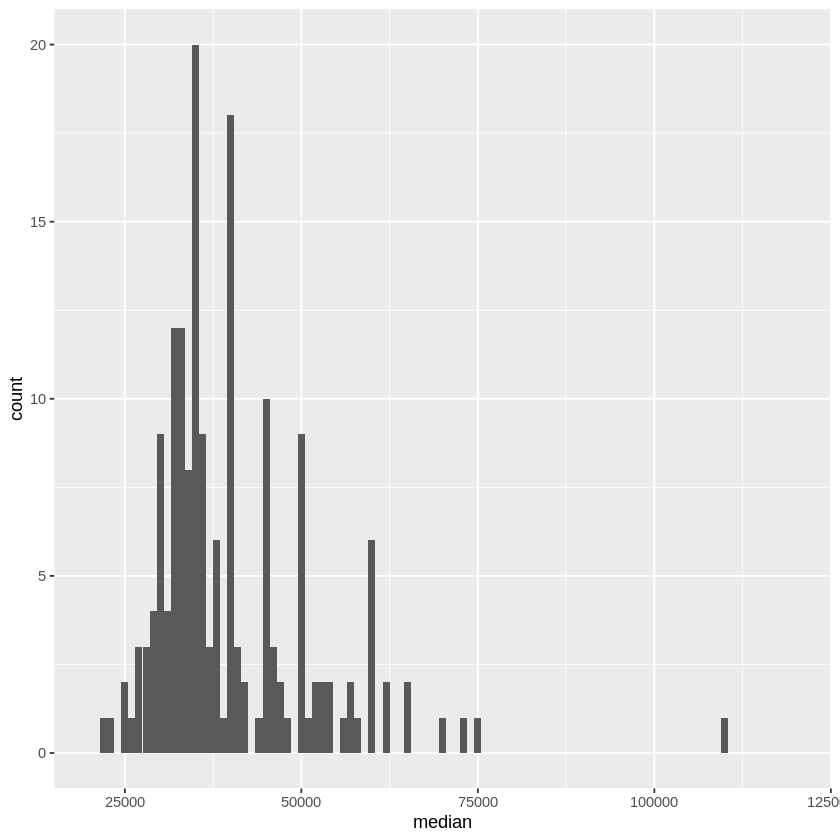

In [7]:
college_recent_grads %>% 
  count(major) %>%
  summarize(major_number = sum(n))  

college_recent_grads %>%
  select(major, median) %>% 
  group_by(major)

#there are 173 different majors so count below represents the number of majors 
#or rows at the same median income level


ggplot(data = college_recent_grads, mapping = aes(x=median)) + 
  geom_histogram(binwidth = 1000) + 
  scale_x_continuous(limits = c(20000, 120000))


##ANSWER TO QUESTION 3

The binwidth I chose was 1000. The reason for this is that if you choose binwidth = 1000, you get a good sense of the data distribution. Further, if you look at individual differences in major median income, you see that most are spaced apart by 1000. 

In [8]:
college_recent_grads %>% 
  summarize(min = min(median), max = max(median),
    mean = mean(median), med = median(median), 
    sd = sd(median), 
    q1 = quantile(median, probs = 0.25),
    q3 = quantile(median, probs = 0.75))

min,max,mean,med,sd,q1,q3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22000,110000,40151.45,36000,11470.18,33000,45000


##ANSWER TO QUESTION 4  

###PROBLEM

You will notice in the above graph for question 3 that we have an oulier at 110,000 for median income. Petroleum Engineering majors have a much larger median income than the rest of the majors; this leads to a skew in our mean which is the mean of all values in the median column. Based on the center of the graph, we expect a mean below 40,000 but it is at 40,000. When the mean is skewed, the standard deviation is also skewed, so we can also ignore this statistic. The median is not a very good measure of distribution because it only gives us information about the center of the data set, rather than its spread. The interquartile range values q1 and q3 are calculated using the median value on each half of the distribution, which means they give an accurate central point for the two halves of the data set regardless of outlier presence. Further, these points tell us about where most of the information in the data set falls (between 33000 and 45000), and thus give us the best idea of how the data is distributed. The IQR tells us about the spread of the graph and matches up with the shape we see, which has a rightward skew. 

Statistic Output:

```
A tibble: 1 × 7
min	max	mean	med	sd	q1	q3
<dbl>	<dbl>	<dbl>	<dbl>	<dbl>	<dbl>	<dbl>
22000	110000	40151.45	36000	11470.18	33000	45000

```



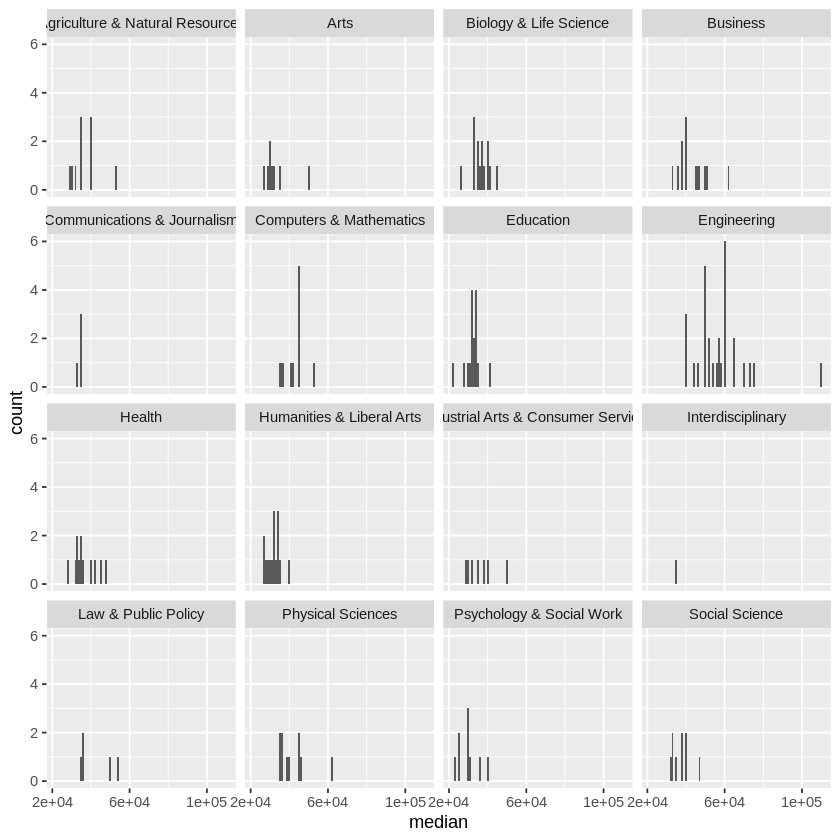

In [9]:
#Code for Question Five

#college_recent_grads%>% 
  #group_by(major_category)

ggplot(college_recent_grads, aes(x = median))+
  geom_histogram(binwidth =1000) + 
  facet_wrap(~major_category) +
  scale_x_continuous(breaks=seq(20000,112000,by=40000))

##ANSWER TO QUESTION 5: SEE GRAPH ABOVE: 
```
ggplot(college_recent_grads, aes(x = median))+
  geom_histogram(binwidth = 5000) + 
  facet_wrap(~major_category)
```



In [10]:
college_recent_grads %>% 
  group_by(major_category) %>% 
  summarise(median = median(median)) %>% 
  arrange(desc(median))

major_category,median
<chr>,<dbl>
Engineering,57000
Computers & Mathematics,45000
Business,40000
Physical Sciences,39500
Social Science,38000
Biology & Life Science,36300
Law & Public Policy,36000
Agriculture & Natural Resources,35000
Communications & Journalism,35000


##ANSWER TO QUESTION 6 

The major with the highest typical median income is engineering. The choice of typical was the median of the median incomes for all majors in the major category. The reason for this choice is that for many of the major categories, including engineering, one major drags on the mean of the data.

In [11]:
##Code for question 7: 

college_recent_grads %>% 
  count(major_category) %>% 
  arrange(n) 


major_category,n
<chr>,<int>
Interdisciplinary,1
Communications & Journalism,4
Law & Public Policy,5
Industrial Arts & Consumer Services,7
Arts,8
Psychology & Social Work,9
Social Science,9
Agriculture & Natural Resources,10
Physical Sciences,10


##ANSWER TO QUESTION 7 

The least popular majors fall under the title of Interdisciplinary. This makes sense because many interdisciplinary majors take extra effort to construct and get approved. 

In [12]:
stem_categories <- c("Biology & Life Science", 
  "Computers & Mathematics", 
  "Engineering", 
  "Physical Sciences")

In [13]:
college_recent_grads <- college_recent_grads %>% 
  mutate(major_type = ifelse(major_category %in% stem_categories, "stem", "not stem")) 

college_recent_grads

rank,major_code,major,major_category,total,sample_size,men,women,sharewomen,employed,⋯,employed_fulltime_yearround,unemployed,unemployment_rate,p25th,median,p75th,college_jobs,non_college_jobs,low_wage_jobs,major_type
<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>
1,2419,Petroleum Engineering,Engineering,2339,36,2057,282,0.12056434,1976,⋯,1207,37,0.018380527,95000,110000,125000,1534,364,193,stem
2,2416,Mining And Mineral Engineering,Engineering,756,7,679,77,0.10185185,640,⋯,388,85,0.117241379,55000,75000,90000,350,257,50,stem
3,2415,Metallurgical Engineering,Engineering,856,3,725,131,0.15303738,648,⋯,340,16,0.024096386,50000,73000,105000,456,176,0,stem
4,2417,Naval Architecture And Marine Engineering,Engineering,1258,16,1123,135,0.10731320,758,⋯,692,40,0.050125313,43000,70000,80000,529,102,0,stem
5,2405,Chemical Engineering,Engineering,32260,289,21239,11021,0.34163050,25694,⋯,16697,1672,0.061097712,50000,65000,75000,18314,4440,972,stem
6,2418,Nuclear Engineering,Engineering,2573,17,2200,373,0.14496697,1857,⋯,1449,400,0.177226407,50000,65000,102000,1142,657,244,stem
7,6202,Actuarial Science,Business,3777,51,2110,1667,0.44135557,2912,⋯,2482,308,0.095652174,53000,62000,72000,1768,314,259,not stem
8,5001,Astronomy And Astrophysics,Physical Sciences,1792,10,832,960,0.53571429,1526,⋯,827,33,0.021167415,31500,62000,109000,972,500,220,stem
9,2414,Mechanical Engineering,Engineering,91227,1029,80320,10907,0.11955890,76442,⋯,54639,4650,0.057342278,48000,60000,70000,52844,16384,3253,stem


In [14]:
college_recent_grads %>% 
  filter(
    major_type == "stem", 
    median < 36000
  ) 


rank,major_code,major,major_category,total,sample_size,men,women,sharewomen,employed,⋯,employed_fulltime_yearround,unemployed,unemployment_rate,p25th,median,p75th,college_jobs,non_college_jobs,low_wage_jobs,major_type
<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>
93,1301,Environmental Science,Biology & Life Science,25965,225,10787,15178,0.5845561,20859,⋯,10916,1779,0.07858468,25000,35600,40200,8149,10076,3175,stem
98,5098,Multi-Disciplinary Or General Science,Physical Sciences,62052,427,27015,35037,0.5646393,46138,⋯,28966,2727,0.05580682,24000,35000,50000,17923,22039,5751,stem
102,3608,Physiology,Biology & Life Science,22060,99,8422,13638,0.6182230,14643,⋯,7588,1088,0.06916280,20000,35000,50000,6587,6894,2237,stem
106,2001,Communication Technologies,Computers & Mathematics,18035,208,11431,6604,0.3661769,14779,⋯,9085,2006,0.11951147,25000,35000,45000,4545,8794,2495,stem
109,3611,Neuroscience,Biology & Life Science,13663,53,4944,8719,0.6381468,9087,⋯,5482,463,0.04848168,30000,35000,44000,5605,2301,902,stem
111,5002,Atmospheric Sciences And Meteorology,Physical Sciences,4043,32,2744,1299,0.3212961,3431,⋯,2161,78,0.02222856,28000,35000,50000,1808,1317,237,stem
123,3699,Miscellaneous Biology,Biology & Life Science,10706,63,4747,5959,0.5566038,7767,⋯,4542,483,0.05854546,23000,33500,48000,4253,2722,459,stem
124,3600,Biology,Biology & Life Science,280709,1370,111762,168947,0.6018582,182295,⋯,100336,13874,0.07072473,24000,33400,45000,88232,81109,28339,stem
133,3604,Ecology,Biology & Life Science,9154,86,3878,5276,0.5763601,7585,⋯,3912,437,0.05447519,23000,33000,42000,2856,4159,976,stem


In [15]:
med <- college_recent_grads$median
med_all <- median(med) 


college_recent_grads %>%  
  filter(major_type == "stem" & median <= med_all) %>% 
  select(major, p25th, median, p75th)


major,p25th,median,p75th
<chr>,<dbl>,<dbl>,<dbl>
Geosciences,21000,36000,41000
Environmental Science,25000,35600,40200
Multi-Disciplinary Or General Science,24000,35000,50000
Physiology,20000,35000,50000
Communication Technologies,25000,35000,45000
Neuroscience,30000,35000,44000
Atmospheric Sciences And Meteorology,28000,35000,50000
Miscellaneous Biology,23000,33500,48000
Biology,24000,33400,45000


##QUESTION 8 ANSWER/CODE: 

The answer to the question is geosciences, environmental science, mutidisciplinary or general science, physiology, communication technologies, neuroscience, atmospheric sciences and meteorolog, miscellaneous biology, biology, ecology, and zoology. 

Warning message:
“Removed 1 rows containing missing values (geom_point).”


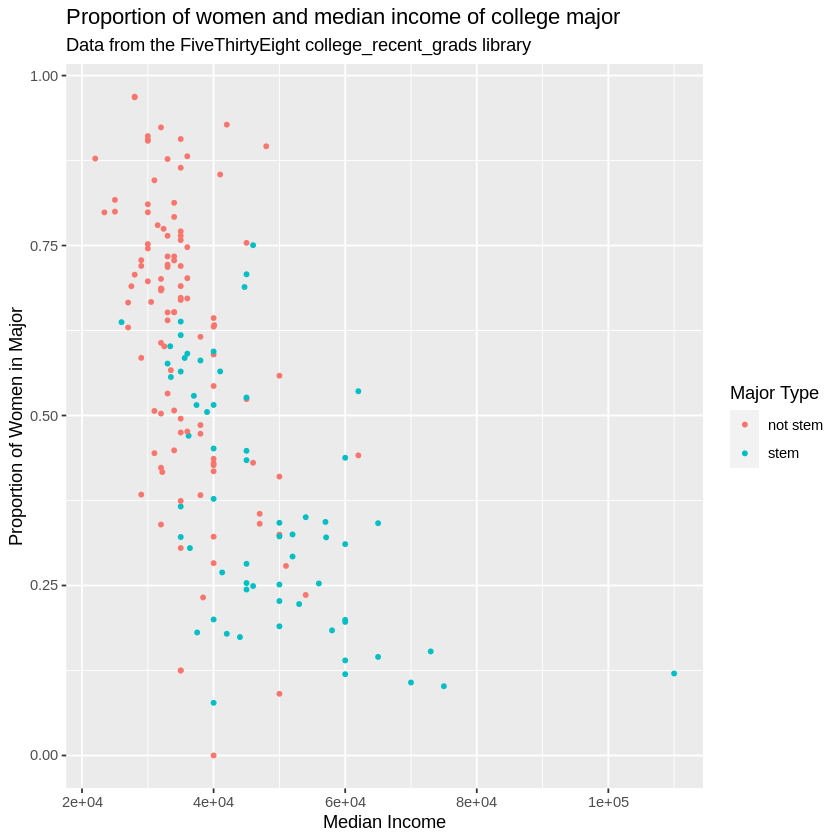

In [16]:
ggplot(data = college_recent_grads, 
       mapping = aes(x = median, y = sharewomen,
                     colour = major_type)) +
  geom_point(size = 1) +
  labs(title = "Proportion of Women and Median Income of College Major",
       subtitle = "Data from the FiveThirtyEight college_recent_grads library",
       x = "Median Income", y = "Proportion of Women in Major",
       colour = "Major Type")

##ANSWER TO QUESTION 9

There is a slight negative correlation between the proportion of women in a non-stem major and median income. The majors with the highest median income tend to have a lower proportion of women. 

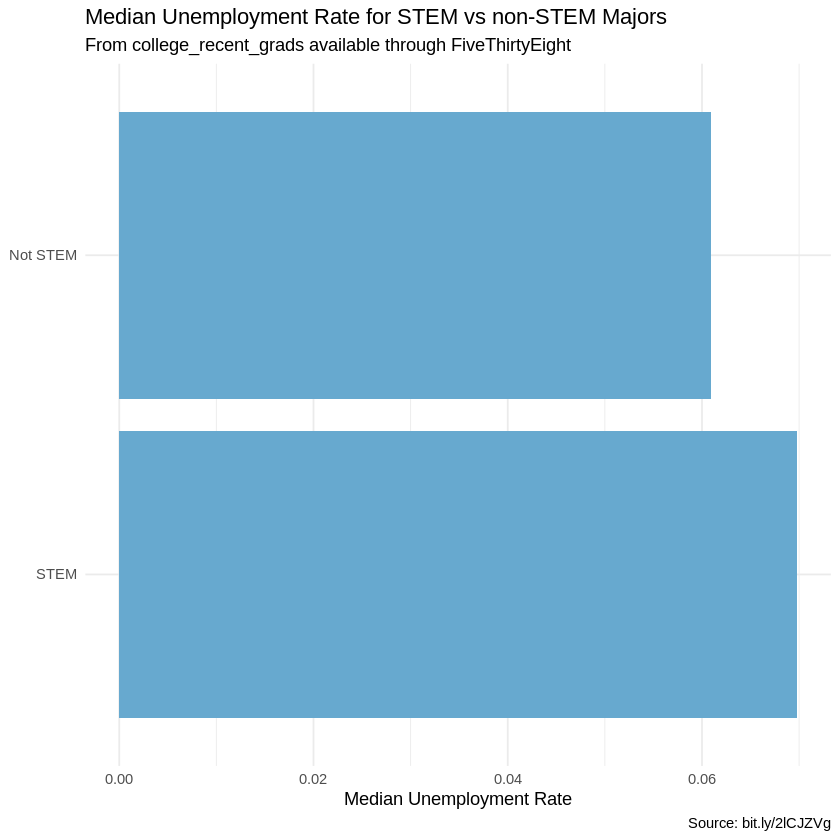

In [38]:
##CODE FOR QUESTION 10 

##goal: compare unemployment rate for STEM versus non-STEM majors. What is the relationship between completing 
#a STEM major and one's chances of employment? 

new_df <- college_recent_grads %>% 
  group_by(major_type) %>% 
  summarize(med_unemployment = median(unemployment_rate)) 
  
new_df %>%
  ggplot(aes(y = major_type, x = med_unemployment)) + 
  geom_bar(stat = "identity", fill = "#67a9cf") +
  labs(title = "Median Unemployment Rate for STEM vs non-STEM Majors",
       subtitle = "From college_recent_grads available through FiveThirtyEight",       
       caption = "Source: bit.ly/2lCJZVg",
       x = NULL, y = NULL) + 
  xlab("Median Unemployment Rate") +
  scale_y_discrete(labels=c("STEM", "Not STEM")) + 
  theme_minimal()
  


  
  